<h1 align="center">Volume 2: The Fourier Transform.</h1>

    <Name> Trevor Wai
    <Class> Section 2
    <Date> 12/4/22

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [22]:
from matplotlib import pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
import numpy as np
import IPython

In [23]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [24]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        #Initialize Attributes
        self.rate = rate
        self.samples = samples


    # Problems 1.1 and 1.7
    def plot(self, dft=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        #Find the Time in seconds
        time = self.samples.size/self.rate
        domain = np.linspace(0, time, self.samples.size)
        #If the boolean is true then find the DFT of the sound wave
        if dft is True:
            plt.subplot(121)
            #Finds the Frequency and Magnitudes
            domain = np.arange(0, self.samples.size) * self.rate / self.samples.size
            mag = np.abs(fft(self.samples))
            #Plots the DFT of the sound wave
            plt.plot(domain[:len(domain)//2], mag[:len(domain)//2]/time)
            plt.ylabel('Magnitude')
            plt.xlabel('Frequency (Hz)')
            plt.title('A DFT of a Sound Wave')
            plt.ylim(ymin=0)
            plt.xlim(xmin=0)
            plt.subplot(122)
        #Plots the graph of the Sound Wave
        plt.plot(domain, self.samples)
        plt.ylim([-32768, 32767])
        plt.xlabel('Time(seconds)')
        plt.ylabel('Samples')
        plt.title('The Plot of the Sound Wave')
        plt.tight_layout()
        plt.show()

    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        #Initialize a copy of the sample
        copy_sample = np.copy(self.samples)

        #Fixes the type to be np.int16
        if force is True or type(self.samples[0]) != np.int16:
            copy_sample = np.int16(self.samples/(np.max(np.abs(self.samples))) * 32767)

        #Generate the wav file
        wavfile.write(filename, self.rate, np.int16(copy_sample))
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        #Raises an error if the sizes are not the same
        if self.samples.size != other.samples.size:
            raise ValueError('Two sample arrays are no the same length.')
        #Combines the samples from two SoundWave objects
        return SoundWave(self.rate, self.samples + other.samples)


    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        #Raises a error if the rates are not the same
        if self.rate != other.rate:
            raise ValueError('The Two sample rates are not equal')
        #Concatenates the samples from two SoundWave objects
        return SoundWave(self.rate, np.append(self.samples, other.samples))
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

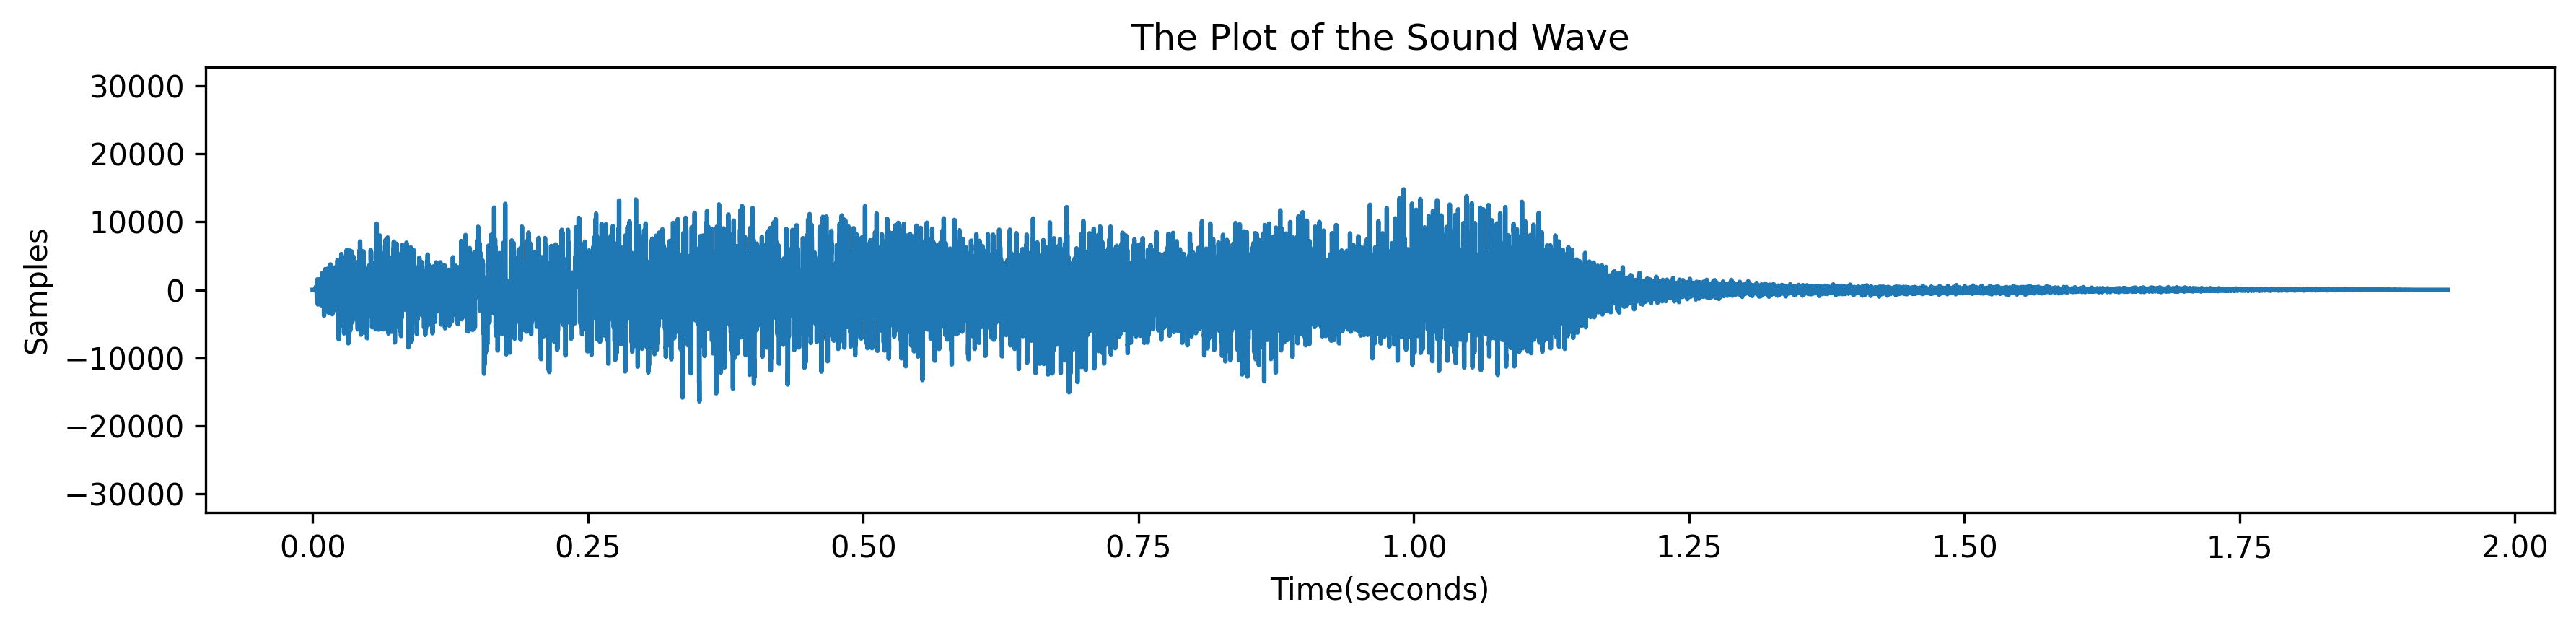

In [25]:
#Finds the Rate and samples and then plots the lab
rate, samples = wavfile.read('tada.wav')

sound = SoundWave(rate, samples)

sound.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [26]:
#Exports a scaled and nonscaled wav file
sound.export('tada_no_scaling.wav')
sound.export('tada_scaling.wav', force=True)

IPython.display.Audio(filename='tada.wav')

In [27]:

IPython.display.Audio(filename='tada_no_scaling.wav')

In [28]:
IPython.display.Audio(filename='tada_scaling.wav')

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [29]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    #Initializes rate
    r = 44100
    domain = np.linspace(0, duration, r * duration)
    #Creates a spcific tone using the frequency
    samples = np.sin(2 * np.pi * frequency * domain)
    sound = SoundWave(r, samples)
    return sound

In [30]:
A = generate_note(440, 2)
IPython.display.Audio(rate=44100, data=A.samples)

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [31]:
#Generate a three-second A minor cord
cord = generate_note(440, 3) + generate_note(523.25, 3) + generate_note(659.25, 3)
IPython.display.Audio(rate=44100, data=cord.samples)

In [32]:
#Generates an A -> C -> E arpeggio
arpeg = generate_note(440,1) >> generate_note(523.25, 1) >> generate_note(659.25, 1)
IPython.display.Audio(rate=44100, data=arpeg.samples)

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [33]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    #Initializes variables
    n = len(samples)
    m = np.arange(n).reshape(n,1)
    #Computes the DFT of an array of samples
    W = np.exp((-2j * np.pi/n) * m @ m.T)
    return W @ samples / n

In [34]:

f = np.array([1,6,2,4])
#Compares the results of using the scipy funciton and our dft function
print(np.allclose(fft(f), simple_dft(f) * 4))

True


### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [35]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    def _split(g):
        n = g.size
        if n <= threshold:
            #Uses the function from problem 5 after n is small enough
            return n * simple_dft(g)
        else:
            #Get the DFT of every other G split between even and odd
            even = _split(g[::2])
            odd = _split(g[1::2])
            #Calculate the exponential parts of the sum
            z = np.exp(-2j * np.pi * np.arange(n) / n)
            m = n // 2
            #Concatenate two arrrays of length m
            return np.append(even + z[:m] * odd, even + z[m:] * odd)
    return _split(samples) / samples.size



In [36]:
f = np.random.random(8192)
#Comparing the results of fft and simple_fft
print(np.allclose(fft(f), 8192 * simple_fft(f)))

#Times simple_dft
print('Time for simple_dft')
%time simple_dft(f)

#Times simple_fft
print('Time for simple_fft')
%time simple_fft(f)

#Times scipy fft
print('Time for fft')
%time fft(f)

print('Nice!')

True
Time for simple_dft
CPU times: total: 2.44 s
Wall time: 9.23 s
Time for simple_fft
CPU times: total: 312 ms
Wall time: 505 ms
Time for fft
CPU times: total: 0 ns
Wall time: 4 ms
Nice!


### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

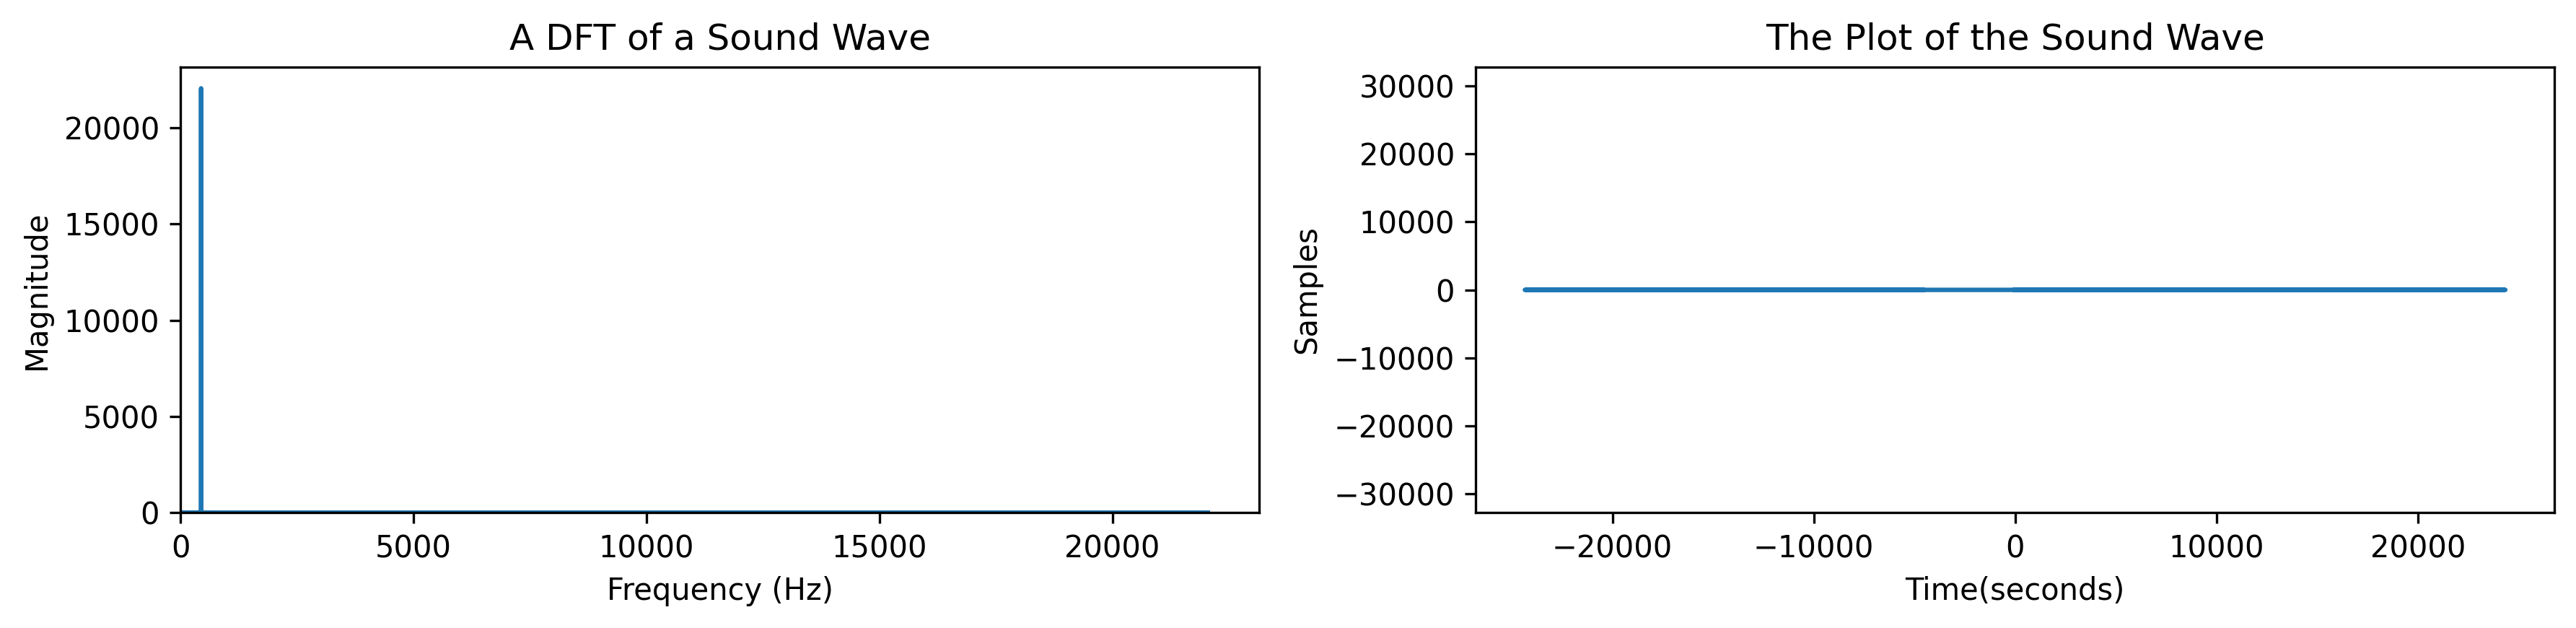

In [37]:
rate, samples = wavfile.read('a.wav')
s = SoundWave(rate, samples)
#Plots the Dft soundwave
s.plot(True)

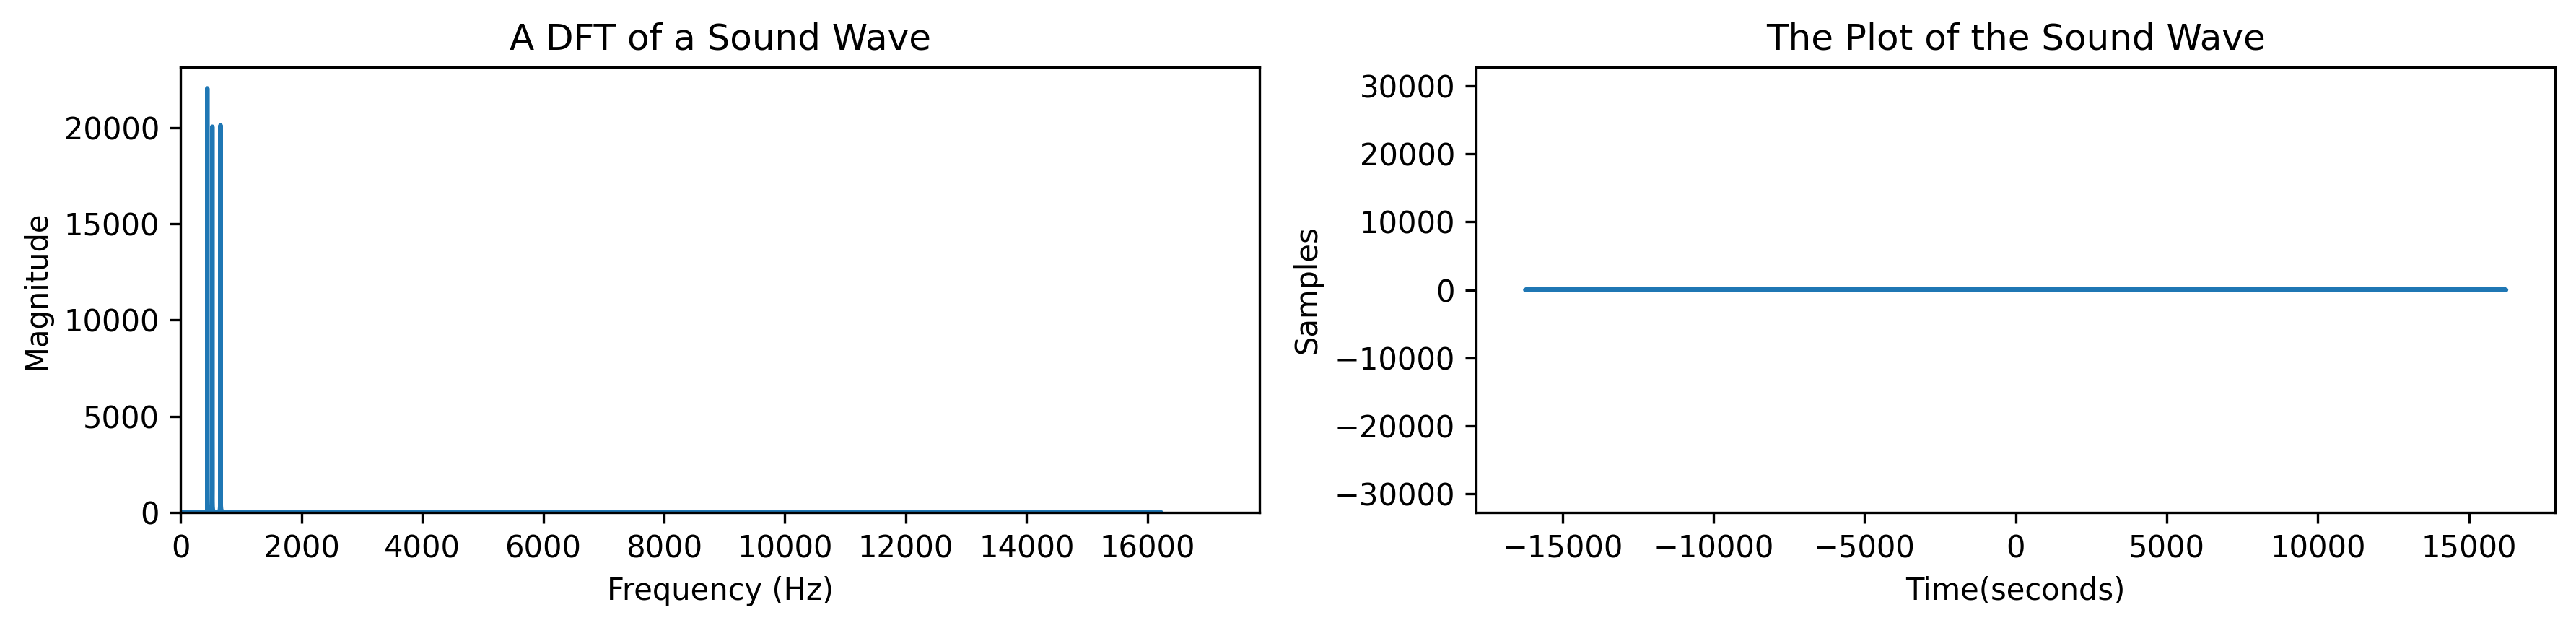

In [38]:
#Plots the DFT of A minor cord
cord.plot(True)

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

In [39]:
#Rates and samples of myster_chord
rates, samples = wavfile.read('mystery_chord.wav')
dft_samples = np.abs(fft(samples))
mystery = dft_samples[:len(dft_samples)//2]
#Finds the frequencies
freq = np.argsort(mystery)[-4:]
N = len(samples)
#Finds the individual notes that are present
hertz = [rate * k/N for k in range(N)]
notes = [hertz[i] for i in freq]
print(f'Hertz: {notes}')
print('These correspond to D, C, G, A')

Hertz: [587.5, 523.25, 784.0, 440.0]
These correspond to D, C, G, A


The notes are...D C G A 

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

The year on the sticker is...